In [1]:
import matplotlib.pyplot as plt
import vaex
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
merged_data = vaex.from_csv('AAPLmerged_data.csv', convert=True, chunk_size=5_000_000, low_memory=False)
merged_data = merged_data.to_pandas_df()
merged_data['Date'] = merged_data['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
merged_data = merged_data.set_index('Date', drop=False)
merged_data

,Date,negative,neutral,positive,sentiment_vader,Open,High,Low,Close,Adj Close,Volume,daily_returns,total_msgs,AAPL
Date,,,,,,,,,,,,,,
2018-01-01,2018-01-01,0.0,7.0,5.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2018-01-02,2018-01-02,1.0,2.0,4.0,0.600000,42.540001,43.075001,42.314999,43.064999,41.075405,102223600.0,NaN,9.0,NaN
2018-01-03,2018-01-03,1.0,2.0,0.0,-1.000000,43.132500,43.637501,42.990002,43.057499,41.068253,118071600.0,-0.017413,1.0,NaN
2018-01-04,2018-01-04,1.0,0.0,1.0,0.000000,43.134998,43.367500,43.020000,43.257500,41.259010,89738400.0,0.464490,3.0,NaN
2018-01-05,2018-01-05,1.0,0.0,0.0,-1.000000,43.360001,43.842499,43.262501,43.750000,41.728760,94640000.0,1.138538,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,2021-06-28,20.0,40.0,28.0,0.166667,133.410004,135.250000,133.350006,134.779999,134.014343,62111300.0,1.254597,76.0,NaN
2021-06-29,2021-06-29,18.0,34.0,26.0,0.181818,134.800003,136.490005,134.350006,136.330002,135.555527,64556100.0,1.150014,70.0,NaN
2021-06-30,2021-06-30,21.0,39.0,21.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,63.0,NaN


In [3]:
trends_pos = merged_data[(merged_data.sentiment_vader * merged_data.daily_returns > 0)]
print("positive correlation:", trends_pos.size/merged_data.size)

positive correlation: 0.39120188531029065


In [4]:
trends_neg = merged_data[(merged_data.sentiment_vader * merged_data.daily_returns < 0)]
print("negative correlation:", trends_neg.size/merged_data.size)

negative correlation: 0.2694422623723488


In [5]:
trends_pos_post2020 = trends_pos[(trends_pos.index > "2020-01-01")]
print("positive correlation:", trends_pos_post2020.size/merged_data.size)

positive correlation: 0.1743912018853103


In [6]:
trends_neg_post2020 = trends_neg[(trends_neg.index > "2020-01-01")]
print("negative correlation:", trends_neg_post2020.size/merged_data.size)

negative correlation: 0.11626080125687353


In [7]:
merged_data.loc[:,'sentiment_abs']= merged_data['sentiment_vader'].abs()
merged_data.loc[:,'daily_returns_abs']= merged_data['daily_returns'].abs()
sentiment_impact = merged_data.sort_values('sentiment_abs', ascending=False)
sentiment_impact = sentiment_impact[sentiment_impact.daily_returns_abs > 2]
sentiment_impact = sentiment_impact[sentiment_impact.sentiment_abs >.5]
sentiment_impact = sentiment_impact[(sentiment_impact.sentiment_vader * sentiment_impact.daily_returns > 0)]
sentiment_impact.sort_values('daily_returns_abs', ascending=False)

,Date,negative,neutral,positive,sentiment_vader,Open,High,Low,Close,Adj Close,Volume,daily_returns,total_msgs,AAPL,sentiment_abs,daily_returns_abs
Date,,,,,,,,,,,,,,,,
2020-03-24,2020-03-24,11.0,22.0,36.0,0.531915,59.090000,61.922501,58.575001,61.720001,60.794071,287531200.0,10.032535,83.0,NaN,0.531915,10.032535
2018-02-12,2018-02-12,4.0,12.0,13.0,0.529412,39.625000,40.972500,39.377499,40.677502,38.956390,243278000.0,4.027880,30.0,NaN,0.529412,4.027880
2019-06-07,2019-06-07,3.0,7.0,14.0,0.647059,46.627499,47.980000,46.442501,47.537498,46.397358,122737600.0,2.661696,31.0,NaN,0.647059,2.661696


In [8]:
percent_change = merged_data.sort_values('daily_returns_abs', ascending=False)
percent_change = percent_change[percent_change.daily_returns_abs > 5]
percent_change = percent_change[percent_change.total_msgs > 1000]
percent_change.sort_values('daily_returns_abs', ascending=False)

,Date,negative,neutral,positive,sentiment_vader,Open,High,Low,Close,Adj Close,Volume,daily_returns,total_msgs,AAPL,sentiment_abs,daily_returns_abs
Date,,,,,,,,,,,,,,,,
2020-07-31,2020-07-31,280.0,449.0,476.0,0.259259,102.885002,106.415001,100.824997,106.260002,104.949203,374336800.0,10.468871,1232.0,NaN,0.259259,10.468871
2020-09-03,2020-09-03,542.0,680.0,644.0,0.086003,126.910004,128.839996,120.500000,120.879997,119.604111,257599600.0,-8.006092,1830.0,NaN,0.086003,8.006092
2020-09-08,2020-09-08,403.0,462.0,431.0,0.033573,113.949997,118.989998,112.680000,112.820000,111.629189,231366600.0,-6.729493,1265.0,NaN,0.033573,6.729493
2020-10-12,2020-10-12,302.0,536.0,462.0,0.209424,120.059998,125.180000,119.279999,124.400002,123.086960,240226800.0,6.352057,1226.0,NaN,0.209424,6.352057
2020-08-21,2020-08-21,540.0,908.0,673.0,0.109646,119.262497,124.867500,119.250000,124.370003,123.057281,338054800.0,5.153247,1886.0,NaN,0.109646,5.153247


In [9]:
relevant_dates = pd.concat([sentiment_impact, percent_change])
relevant_dates

dates = relevant_dates['Date'].tolist()

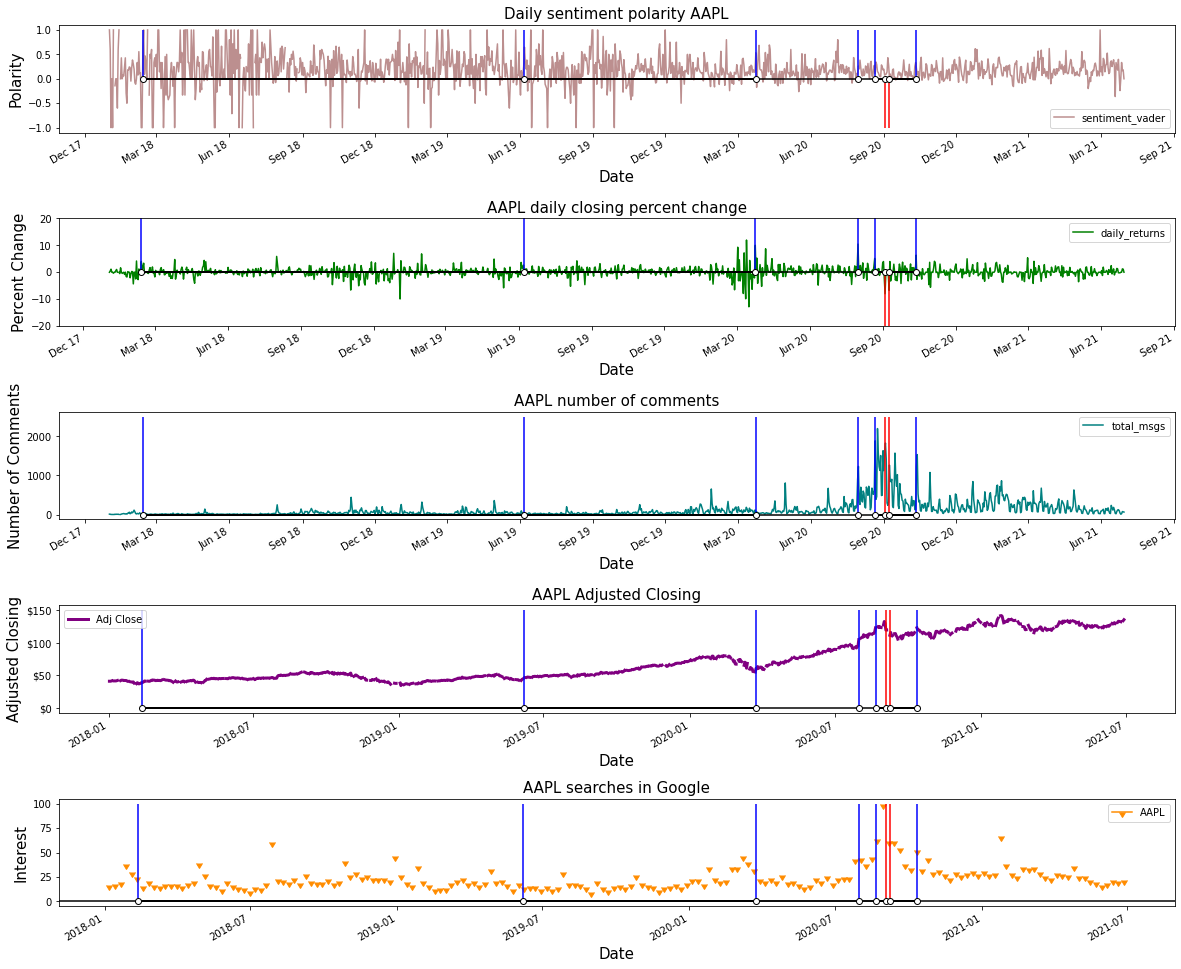

In [12]:
fig, (ax , ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(20,18))
fig.subplots_adjust(hspace = 0.8)

merged_data.plot.line( y = 'sentiment_vader',color='rosybrown', ax = ax)
merged_data.plot.line( y = 'daily_returns',color='green', ax = ax1, use_index=True)
merged_data.plot.line( y = 'total_msgs',color='teal', ax = ax2)
merged_data.plot.line( y = 'Adj Close',color='purple', ax = ax3, linewidth=3)
merged_data.plot.line( y = 'AAPL',color='darkorange', ax = ax4, marker=11 )

#black line in return = 0
plt.axhline(y=0.0, color='black')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)

ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)

ax3.xaxis.label.set_size(15)
ax3.yaxis.label.set_size(15)

ax4.xaxis.label.set_size(15)
ax4.yaxis.label.set_size(15)

ax.set( xlabel='Date', ylabel='Polarity', title='Daily sentiment polarity AAPL' )
ax1.set( xlabel='Date', ylabel='Percent Change', title='AAPL daily closing percent change')
ax2.set( xlabel='Date', ylabel='Number of Comments', title='AAPL number of comments')
ax3.set( xlabel='Date', ylabel='Adjusted Closing', title='AAPL Adjusted Closing')

ax4.set( xlabel='Date', ylabel='Interest', title='AAPL searches in Google')

ax3.yaxis.set_major_formatter('${x:,.0f}')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

#ax1.set_xticklabels([x.strftime("%b %y") for x in merged_data.index], rotation=45)
    #    ax.set_title('Monthly Balance')
#ax.title.set_size(15)
#ax1.set_title('TSLA daily closing percent change')
ax1.set_ylim(-20,20)
ax.title.set_size(15)
ax1.title.set_size(15)
ax2.title.set_size(15)
ax3.title.set_size(15)
ax4.title.set_size(15)

# Choose some nice levels for milestones
levels0 = [1 if x >= 0 else -1 for x in relevant_dates.daily_returns]
levels1 = [20 if x >= 0 else -20 for x in relevant_dates.daily_returns]
# levels2 = [4000 if x >= 0 else -4000 for x in relevant_dates.daily_returns]
# levels3 = [800 if x >= 0 else -800 for x in relevant_dates.daily_returns]
# levels4 = [100 if x >= 0 else -100 for x in relevant_dates.daily_returns]

colors = ['blue' if x >= 0 else 'red' for x in relevant_dates.daily_returns]

# Add vertical lines for milestones
ax.vlines(dates, 0, levels0, color=colors)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax1.vlines(dates, 0, levels1, color=colors)  # The vertical stems.
ax1.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax2.vlines(dates, 0, 2500, color=colors)  # The vertical stems.
ax2.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax3.vlines(dates, 0, 150, color=colors)  # The vertical stems.
ax3.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax4.vlines(dates, 0, 100, color=colors)  # The vertical stems.
ax4.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.